### Imorting Libraries

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn import preprocessing
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn import metrics

### Reading the .csv files into pandas

In [83]:
X = pd.read_csv("train.csv", index_col='tracking_id')
X_test_full = pd.read_csv("test.csv", index_col='tracking_id')

In [84]:
X.head(5)

datetime  wind_speed(m/s)  \
tracking_id                                         
WM_33725     2019-08-04 14:33:20        94.820023   
WM_698       2018-11-05 10:13:20       241.832734   
WM_39146     2019-09-14 14:03:20        95.484724   
WM_6757      2018-12-25 15:33:20       238.819424   
WM_21521     2019-05-04 03:13:20        10.722890   

             atmospheric_temperature(°C)  shaft_temperature(°C)  \
tracking_id                                                       
WM_33725                      -99.000000              41.723019   
WM_698                         27.764785             -99.000000   
WM_39146                             NaN              41.855473   
WM_6757                       -99.000000              45.443914   
WM_21521                             NaN              41.981183   

             blades_angle(°)  gearbox_temperature(°C)  engine_temperature(°C)  \
tracking_id                                                                     
WM_33725           -0.903423                82.410573               42.523015   
WM_698            -99.000000                44.104919               46.258870   
WM_39146           12.652763                42.322098               42.878552   
WM_6757            15.115323                44.759643               47.282101   
WM_21521            1.715696               -17.616459               43.469852   

             motor_torque(N-m)  generator_temperature(°C)  \
tracking_id                                                 
WM_33725           2563.124522                  76.665560   
WM_698             2372.384119                  78.129803   
WM_39146           1657.169646                  67.654469   
WM_6757            2888.134079                  95.389974   
WM_21521            781.695419                  37.423065   

             atmospheric_pressure(Pascal)  ...  windmill_body_temperature(°C)  \
tracking_id                                ...                                  
WM_33725                    103402.961872  ...                            NaN   
WM_698                       17030.904078  ...                            NaN   
WM_39146                     16125.927107  ...                      45.033197   
WM_6757                      18689.732336  ...                      44.827154   
WM_21521                    114468.169007  ...                     -99.000000   

             wind_direction(°)  resistance(ohm)  rotor_torque(N-m)  \
tracking_id                                                          
WM_33725            239.836388      2730.310605          42.084666   
WM_698              337.944723      1780.207200         107.888643   
WM_39146            227.850294      1666.049900         -42.931459   
WM_6757             492.081520      1964.502895          42.744596   
WM_21521            259.274601      1177.516152          13.387289   

             turbine_status cloud_level blade_length(m)  blade_breadth(m)  \
tracking_id                                                                 
WM_33725                 BA      Medium        2.217542          0.314065   
WM_698                   A2      Medium        4.210346          0.448494   
WM_39146                ABC      Medium        2.719475          0.302321   
WM_6757                 ABC         NaN        4.857385          0.367140   
WM_21521                AAA      Medium             NaN          0.453374   

             windmill_height(m)  windmill_generated_power(kW/h)  
tracking_id                                                      
WM_33725              24.281689                        6.766521  
WM_698                27.262139                        5.966275  
WM_39146              27.366127                        2.874342  
WM_6757               24.287767                       14.851089  
WM_21521              27.971650                        3.519074  

[5 rows x 21 columns]

In [85]:
X_test_full.head(5)

datetime  wind_speed(m/s)  \
tracking_id                                         
WM_19817     2019-04-17 08:53:20        94.324266   
WM_18723     2019-03-30 07:43:20        10.088870   
WM_34552     2019-08-10 11:33:20       347.152090   
WM_28570     2019-06-26 03:53:20        24.471997   
WM_36934     2019-08-27 16:43:20        96.997026   

             atmospheric_temperature(°C)  shaft_temperature(°C)  \
tracking_id                                                       
WM_19817                       17.641186              89.714193   
WM_18723                       13.978119              43.272846   
WM_34552                       31.423035              41.076640   
WM_28570                      -99.000000              14.375078   
WM_36934                       33.281836              41.405192   

             blades_angle(°)  gearbox_temperature(°C)  engine_temperature(°C)  \
tracking_id                                                                     
WM_19817           51.146788                40.460560               39.594734   
WM_18723           46.516394                40.027788               41.176860   
WM_34552           26.931602                43.109122               43.439556   
WM_28570           66.513953                13.741253               15.577472   
WM_36934            1.843112               121.572907               43.934587   

             motor_torque(N-m)  generator_temperature(°C)  \
tracking_id                                                 
WM_19817           1073.202715                  66.830037   
WM_18723            517.436430                  37.284163   
WM_34552           1480.716492                  70.010762   
WM_28570            887.979475                  41.445258   
WM_36934           2053.916354                  68.007787   

             atmospheric_pressure(Pascal)  area_temperature(°C)  \
tracking_id                                                       
WM_19817                     16681.044117             24.004812   
WM_18723                              NaN             29.431813   
WM_34552                    214812.836175             29.924235   
WM_28570                              NaN             23.886434   
WM_36934                     16833.546517             35.906889   

             windmill_body_temperature(°C)  wind_direction(°)  \
tracking_id                                                     
WM_19817                         43.756693         445.976992   
WM_18723                         42.728174         499.595287   
WM_34552                         43.256122         245.432231   
WM_28570                         13.501595                NaN   
WM_36934                        -99.000000         442.425744   

             resistance(ohm)  rotor_torque(N-m) turbine_status cloud_level  \
tracking_id                                                                  
WM_19817         1664.222023          21.912243             BA      Medium   
WM_18723         1165.111992         -35.050093              A      Medium   
WM_34552         1667.720491          27.195302             B2      Medium   
WM_28570         1329.744740          15.245757            BBB         Low   
WM_36934          691.408996          34.257024              A         Low   

             blade_length(m)  blade_breadth(m)  windmill_height(m)  
tracking_id                                                         
WM_19817            3.185837          0.403965           25.572431  
WM_18723            3.016603          0.444755           24.371823  
WM_34552            2.611941          0.387368           27.654677  
WM_28570            2.866805          0.450478           24.189426  
WM_36934            3.549672          0.368355            4.885440

### Data Cleansing

Checking the missing values in train and test data

In [86]:
X.isnull().sum()

datetime                             0
wind_speed(m/s)                    273
atmospheric_temperature(°C)       3450
shaft_temperature(°C)                2
blades_angle(°)                    216
gearbox_temperature(°C)              1
engine_temperature(°C)              12
motor_torque(N-m)                   24
generator_temperature(°C)           12
atmospheric_pressure(Pascal)      2707
area_temperature(°C)                 0
windmill_body_temperature(°C)     2363
wind_direction(°)                 5103
resistance(ohm)                      1
rotor_torque(N-m)                  572
turbine_status                    1759
cloud_level                        276
blade_length(m)                   5093
blade_breadth(m)                     0
windmill_height(m)                 543
windmill_generated_power(kW/h)     207
dtype: int64

In [87]:
X_test_full.isnull().sum()

datetime                            0
wind_speed(m/s)                   126
atmospheric_temperature(°C)      1427
shaft_temperature(°C)               1
blades_angle(°)                   106
gearbox_temperature(°C)             1
engine_temperature(°C)              5
motor_torque(N-m)                  11
generator_temperature(°C)           5
atmospheric_pressure(Pascal)     1151
area_temperature(°C)                1
windmill_body_temperature(°C)     926
wind_direction(°)                2160
resistance(ohm)                     0
rotor_torque(N-m)                 281
turbine_status                    797
cloud_level                       125
blade_length(m)                  2114
blade_breadth(m)                    0
windmill_height(m)                255
dtype: int64

Let us check the the data information to get more insight

In [88]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28200 entries, WM_33725 to WM_33004
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   datetime                        28200 non-null  object 
 1   wind_speed(m/s)                 27927 non-null  float64
 2   atmospheric_temperature(°C)     24750 non-null  float64
 3   shaft_temperature(°C)           28198 non-null  float64
 4   blades_angle(°)                 27984 non-null  float64
 5   gearbox_temperature(°C)         28199 non-null  float64
 6   engine_temperature(°C)          28188 non-null  float64
 7   motor_torque(N-m)               28176 non-null  float64
 8   generator_temperature(°C)       28188 non-null  float64
 9   atmospheric_pressure(Pascal)    25493 non-null  float64
 10  area_temperature(°C)            28200 non-null  float64
 11  windmill_body_temperature(°C)   25837 non-null  float64
 12  wind_direction(°)          

In [89]:
X_test_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12086 entries, WM_19817 to WM_14513
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   datetime                       12086 non-null  object 
 1   wind_speed(m/s)                11960 non-null  float64
 2   atmospheric_temperature(°C)    10659 non-null  float64
 3   shaft_temperature(°C)          12085 non-null  float64
 4   blades_angle(°)                11980 non-null  float64
 5   gearbox_temperature(°C)        12085 non-null  float64
 6   engine_temperature(°C)         12081 non-null  float64
 7   motor_torque(N-m)              12075 non-null  float64
 8   generator_temperature(°C)      12081 non-null  float64
 9   atmospheric_pressure(Pascal)   10935 non-null  float64
 10  area_temperature(°C)           12085 non-null  float64
 11  windmill_body_temperature(°C)  11160 non-null  float64
 12  wind_direction(°)              9926 non-n

Checking the unique values in the features.

In [90]:
X.nunique()

datetime                          28200
wind_speed(m/s)                   27727
atmospheric_temperature(°C)       20809
shaft_temperature(°C)             27625
blades_angle(°)                   22830
gearbox_temperature(°C)           27911
engine_temperature(°C)            28188
motor_torque(N-m)                 27660
generator_temperature(°C)         28187
atmospheric_pressure(Pascal)      25492
area_temperature(°C)              28170
windmill_body_temperature(°C)     21893
wind_direction(°)                 22984
resistance(ohm)                   27365
rotor_torque(N-m)                 25945
turbine_status                       14
cloud_level                           3
blade_length(m)                   22833
blade_breadth(m)                  28200
windmill_height(m)                27657
windmill_generated_power(kW/h)    27988
dtype: int64

In [91]:
X_test_full.nunique()

datetime                         12086
wind_speed(m/s)                  11875
atmospheric_temperature(°C)       8988
shaft_temperature(°C)            11839
blades_angle(°)                   9820
gearbox_temperature(°C)          11952
engine_temperature(°C)           12081
motor_torque(N-m)                11856
generator_temperature(°C)        12081
atmospheric_pressure(Pascal)     10935
area_temperature(°C)             12075
windmill_body_temperature(°C)     9459
wind_direction(°)                 9885
resistance(ohm)                  11727
rotor_torque(N-m)                11128
turbine_status                      14
cloud_level                          3
blade_length(m)                   9849
blade_breadth(m)                 12086
windmill_height(m)               11831
dtype: int64

Before filling the missing values let us dive deep into the categorical values.

In [92]:
print(X['turbine_status'].value_counts())
print(X_test_full['turbine_status'].value_counts())

BB     1946
AAA    1939
BCB    1933
B2     1931
A      1930
D      1922
B      1882
AB     1868
ABC    1867
A2     1855
BA     1854
AC     1850
BD     1843
BBB    1821
Name: turbine_status, dtype: int64
BB     871
B2     859
A      852
BBB    813
BCB    811
BA     809
AB     804
A2     796
ABC    787
BD     787
D      786
AC     778
AAA    773
B      763
Name: turbine_status, dtype: int64


In [93]:
print(X['cloud_level'].value_counts())
print(X_test_full['cloud_level'].value_counts())

Low              13921
Medium           13704
Extremely Low      299
Name: cloud_level, dtype: int64
Low              5932
Medium           5893
Extremely Low     136
Name: cloud_level, dtype: int64


Now let us start filling the missing values by mean for the numerical and mode for the categorical values.


Note : It seems to be confusing when you see the missing data, the unique thing is that even the target value has the missing values. Better not to fill the missing values of the target value as it might mislead to the model predictions.

In [94]:
X['gearbox_temperature(°C)'].fillna(X['gearbox_temperature(°C)'].mean(),inplace=True)
X['area_temperature(°C)'].fillna(X['area_temperature(°C)'].mean(),inplace=True)
X['rotor_torque(N-m)'].fillna(X['rotor_torque(N-m)'].mean(),inplace=True)
X['blade_length(m)'].fillna(X['blade_length(m)'].mean(),inplace=True)
X['blade_breadth(m)'].fillna(X['blade_breadth(m)'].mean(),inplace=True)
X['windmill_height(m)'].fillna(X['windmill_height(m)'].mean(),inplace=True)
X['cloud_level'].fillna(X['cloud_level'].mode()[0],inplace=True)
X['atmospheric_temperature(°C)'].fillna(X['atmospheric_temperature(°C)'].mean(),inplace=True)
X['atmospheric_pressure(Pascal)'].fillna(X['atmospheric_pressure(Pascal)'].mean(),inplace=True)
X['wind_speed(m/s)'].fillna(X['wind_speed(m/s)'].mean(),inplace=True)
X['shaft_temperature(°C)'].fillna(X['shaft_temperature(°C)'].mean(),inplace=True)
X['blades_angle(°)'].fillna(X['blades_angle(°)'].mean(),inplace=True)
X['engine_temperature(°C)'].fillna(X['engine_temperature(°C)'].mean(),inplace=True)
X['motor_torque(N-m)'].fillna(X['motor_torque(N-m)'].mean(),inplace=True)
X['wind_direction(°)'].fillna(X['wind_direction(°)'].mean(),inplace=True)
X['generator_temperature(°C)'].fillna(X['generator_temperature(°C)'].mean(),inplace=True)
X['windmill_body_temperature(°C)'].fillna(X['windmill_body_temperature(°C)'].mean(),inplace=True)
X['turbine_status'].fillna(X['turbine_status'].mode()[0],inplace=True)
X['resistance(ohm)'].fillna(X['resistance(ohm)'].mean(),inplace=True)

In [95]:
X_test_full['gearbox_temperature(°C)'].fillna(X_test_full['gearbox_temperature(°C)'].mean(),inplace=True)
X_test_full['area_temperature(°C)'].fillna(X_test_full['area_temperature(°C)'].mean(),inplace=True)
X_test_full['rotor_torque(N-m)'].fillna(X_test_full['rotor_torque(N-m)'].mean(),inplace=True)
X_test_full['blade_length(m)'].fillna(X_test_full['blade_length(m)'].mean(),inplace=True)
X_test_full['blade_breadth(m)'].fillna(X_test_full['blade_breadth(m)'].mean(),inplace=True)
X_test_full['windmill_height(m)'].fillna(X_test_full['windmill_height(m)'].mean(),inplace=True)
X_test_full['cloud_level'].fillna(X_test_full['cloud_level'].mode()[0],inplace=True)
X_test_full['atmospheric_temperature(°C)'].fillna(X_test_full['atmospheric_temperature(°C)'].mean(),inplace=True)
X_test_full['atmospheric_pressure(Pascal)'].fillna(X_test_full['atmospheric_pressure(Pascal)'].mean(),inplace=True)
X_test_full['wind_speed(m/s)'].fillna(X_test_full['wind_speed(m/s)'].mean(),inplace=True)
X_test_full['shaft_temperature(°C)'].fillna(X_test_full['shaft_temperature(°C)'].mean(),inplace=True)
X_test_full['blades_angle(°)'].fillna(X_test_full['blades_angle(°)'].mean(),inplace=True)
X_test_full['engine_temperature(°C)'].fillna(X_test_full['engine_temperature(°C)'].mean(),inplace=True)
X_test_full['motor_torque(N-m)'].fillna(X_test_full['motor_torque(N-m)'].mean(),inplace=True)
X_test_full['wind_direction(°)'].fillna(X_test_full['wind_direction(°)'].mean(),inplace=True)
X_test_full['generator_temperature(°C)'].fillna(X_test_full['generator_temperature(°C)'].mean(),inplace=True)
X_test_full['windmill_body_temperature(°C)'].fillna(X_test_full['windmill_body_temperature(°C)'].mean(),inplace=True)
X_test_full['turbine_status'].fillna(X_test_full['turbine_status'].mode()[0],inplace=True)
X_test_full['resistance(ohm)'].fillna(X_test_full['resistance(ohm)'].mean(),inplace=True)

### Exploratory Data Analysis

In [96]:
X.describe()

wind_speed(m/s)  atmospheric_temperature(°C)  shaft_temperature(°C)  \
count     28200.000000                 28200.000000           28200.000000   
mean         69.037071                     0.383727              40.085387   
std          75.905527                    41.481572              27.203465   
min        -496.211029                   -99.000000             -99.000000   
25%          21.250907                     0.383727              41.632797   
50%          93.256368                    14.150602              43.685853   
75%          95.248020                    22.575311              45.673234   
max         601.455670                    80.217444             169.820455   

       blades_angle(°)  gearbox_temperature(°C)  engine_temperature(°C)  \
count     28200.000000             28200.000000            28200.000000   
mean         -9.654038                41.027755               42.614239   
std          47.734286                43.662831                6.123243   
min        -146.259543              -244.974098                3.167151   
25%          -1.206613                40.557993               41.911899   
50%          -0.527911                43.221521               43.524018   
75%           5.370015                45.879212               45.173397   
max         165.932123               999.000000               50.000000   

       motor_torque(N-m)  generator_temperature(°C)  \
count       28200.000000               28200.000000   
mean         1710.819803                  65.027857   
std           826.853447                  19.812283   
min           500.000000                  33.893779   
25%           870.621152                  41.200625   
50%          2031.299986                  70.722083   
75%          2462.164052                  78.939478   
max          3000.000000                 100.000000   

       atmospheric_pressure(Pascal)  area_temperature(°C)  \
count                  2.820000e+04          28200.000000   
mean                   5.318506e+04             32.735091   
std                    1.782768e+05              7.703391   
min                   -1.188624e+06            -30.000000   
25%                    1.689269e+04             27.311644   
50%                    1.875303e+04             32.605195   
75%                    1.164252e+05             38.232387   
max                    1.272552e+06             55.000000   

       windmill_body_temperature(°C)  wind_direction(°)  resistance(ohm)  \
count                   28200.000000       28200.000000     28200.000000   
mean                       20.799761         306.888883      1575.560011   
std                        52.029149         121.321415       483.317824   
min                      -999.000000           0.000000     -1005.222988   
25%                        20.799761         246.793261      1268.141402   
50%                        42.495191         290.113549      1678.231923   
75%                        44.325305         332.325695      1829.044723   
max                       323.000000         569.966479      4693.481933   

       rotor_torque(N-m)  blade_length(m)  blade_breadth(m)  \
count       28200.000000     28200.000000      28200.000000   
mean           25.849894         2.254034          0.397249   
std            32.093408        10.206698          0.061158   
min          -136.732217       -99.000000          0.200111   
25%            13.829618         2.254034          0.347445   
50%            31.549128         3.049007          0.398591   
75%            41.337104         4.156647          0.449354   
max           236.883264        18.209800          0.499975   

       windmill_height(m)  windmill_generated_power(kW/h)  
count        28200.000000                    27993.000000  
mean            25.887052                        6.130529  
std              7.698401                        2.697520  
min            -30.295253                        0.962305  
25%             24.469380    

In [97]:
X_test_full.describe()

wind_speed(m/s)  atmospheric_temperature(°C)  shaft_temperature(°C)  \
count     12086.000000                 12086.000000           12086.000000   
mean         69.381862                     0.687445              39.936571   
std          75.721631                    41.368648              27.113378   
min        -525.530600                   -99.000000             -99.000000   
25%          22.168108                     0.687445              41.635178   
50%          93.288643                    14.268344              43.707705   
75%          95.228791                    22.744798              45.755861   
max         525.434211                    80.442232             183.299983   

       blades_angle(°)  gearbox_temperature(°C)  engine_temperature(°C)  \
count     12086.000000             12086.000000            12086.000000   
mean         -9.218509                40.318639               42.604738   
std          47.365263                42.480064                6.213838   
min         -99.000000              -185.860883               -5.000000   
25%          -1.200378                40.459387               41.926556   
50%          -0.529922                43.219696               43.551829   
75%           6.028020                45.840069               45.227942   
max         170.047823               563.000000               49.858945   

       motor_torque(N-m)  generator_temperature(°C)  \
count       12086.000000               12086.000000   
mean         1717.343991                  65.237894   
std           829.431463                  19.864025   
min           500.000000                  30.000000   
25%           874.600120                  41.285062   
50%          2031.691733                  70.793474   
75%          2479.582123                  79.427893   
max          2997.013769                  99.571599   

       atmospheric_pressure(Pascal)  area_temperature(°C)  \
count                  1.208600e+04          12086.000000   
mean                   5.428332e+04             32.796168   
std                    1.781158e+05              7.671602   
min                   -1.207259e+06            -30.000000   
25%                    1.690488e+04             27.407281   
50%                    1.870774e+04             32.659540   
75%                    1.164036e+05             38.302580   
max                    1.127571e+06             53.927698   

       windmill_body_temperature(°C)  wind_direction(°)  resistance(ohm)  \
count                   12086.000000       12086.000000     12086.000000   
mean                       20.906469         308.376140      1581.289398   
std                        51.208956         121.366283       483.125121   
min                       -99.000000           0.000000     -1654.449587   
25%                        20.906469         247.242960      1272.310773   
50%                        42.530522         291.206974      1680.225602   
75%                        44.355803         335.347247      1837.302026   
max                       191.979747         570.857751      4106.196001   

       rotor_torque(N-m)  blade_length(m)  blade_breadth(m)  \
count       12086.000000     12086.000000      12086.000000   
mean           26.566581         2.201328          0.397527   
std            31.728393        10.457889          0.061661   
min          -182.169613       -99.000000          0.200009   
25%            13.886059         2.201328          0.346909   
50%            31.430853         3.044582          0.399637   
75%            41.759021         4.156727          0.450488   
max           213.260076        17.847936          0.499985   

       windmill_height(m)  
count        12086.000000  
mean            25.963743  
std              7.634222  
min            -21.215639  
25%             24.490326  
50%             25.963743  
75%             27.458013  
max             77.604969

Understanding the pattern between one on one feature through pairplot

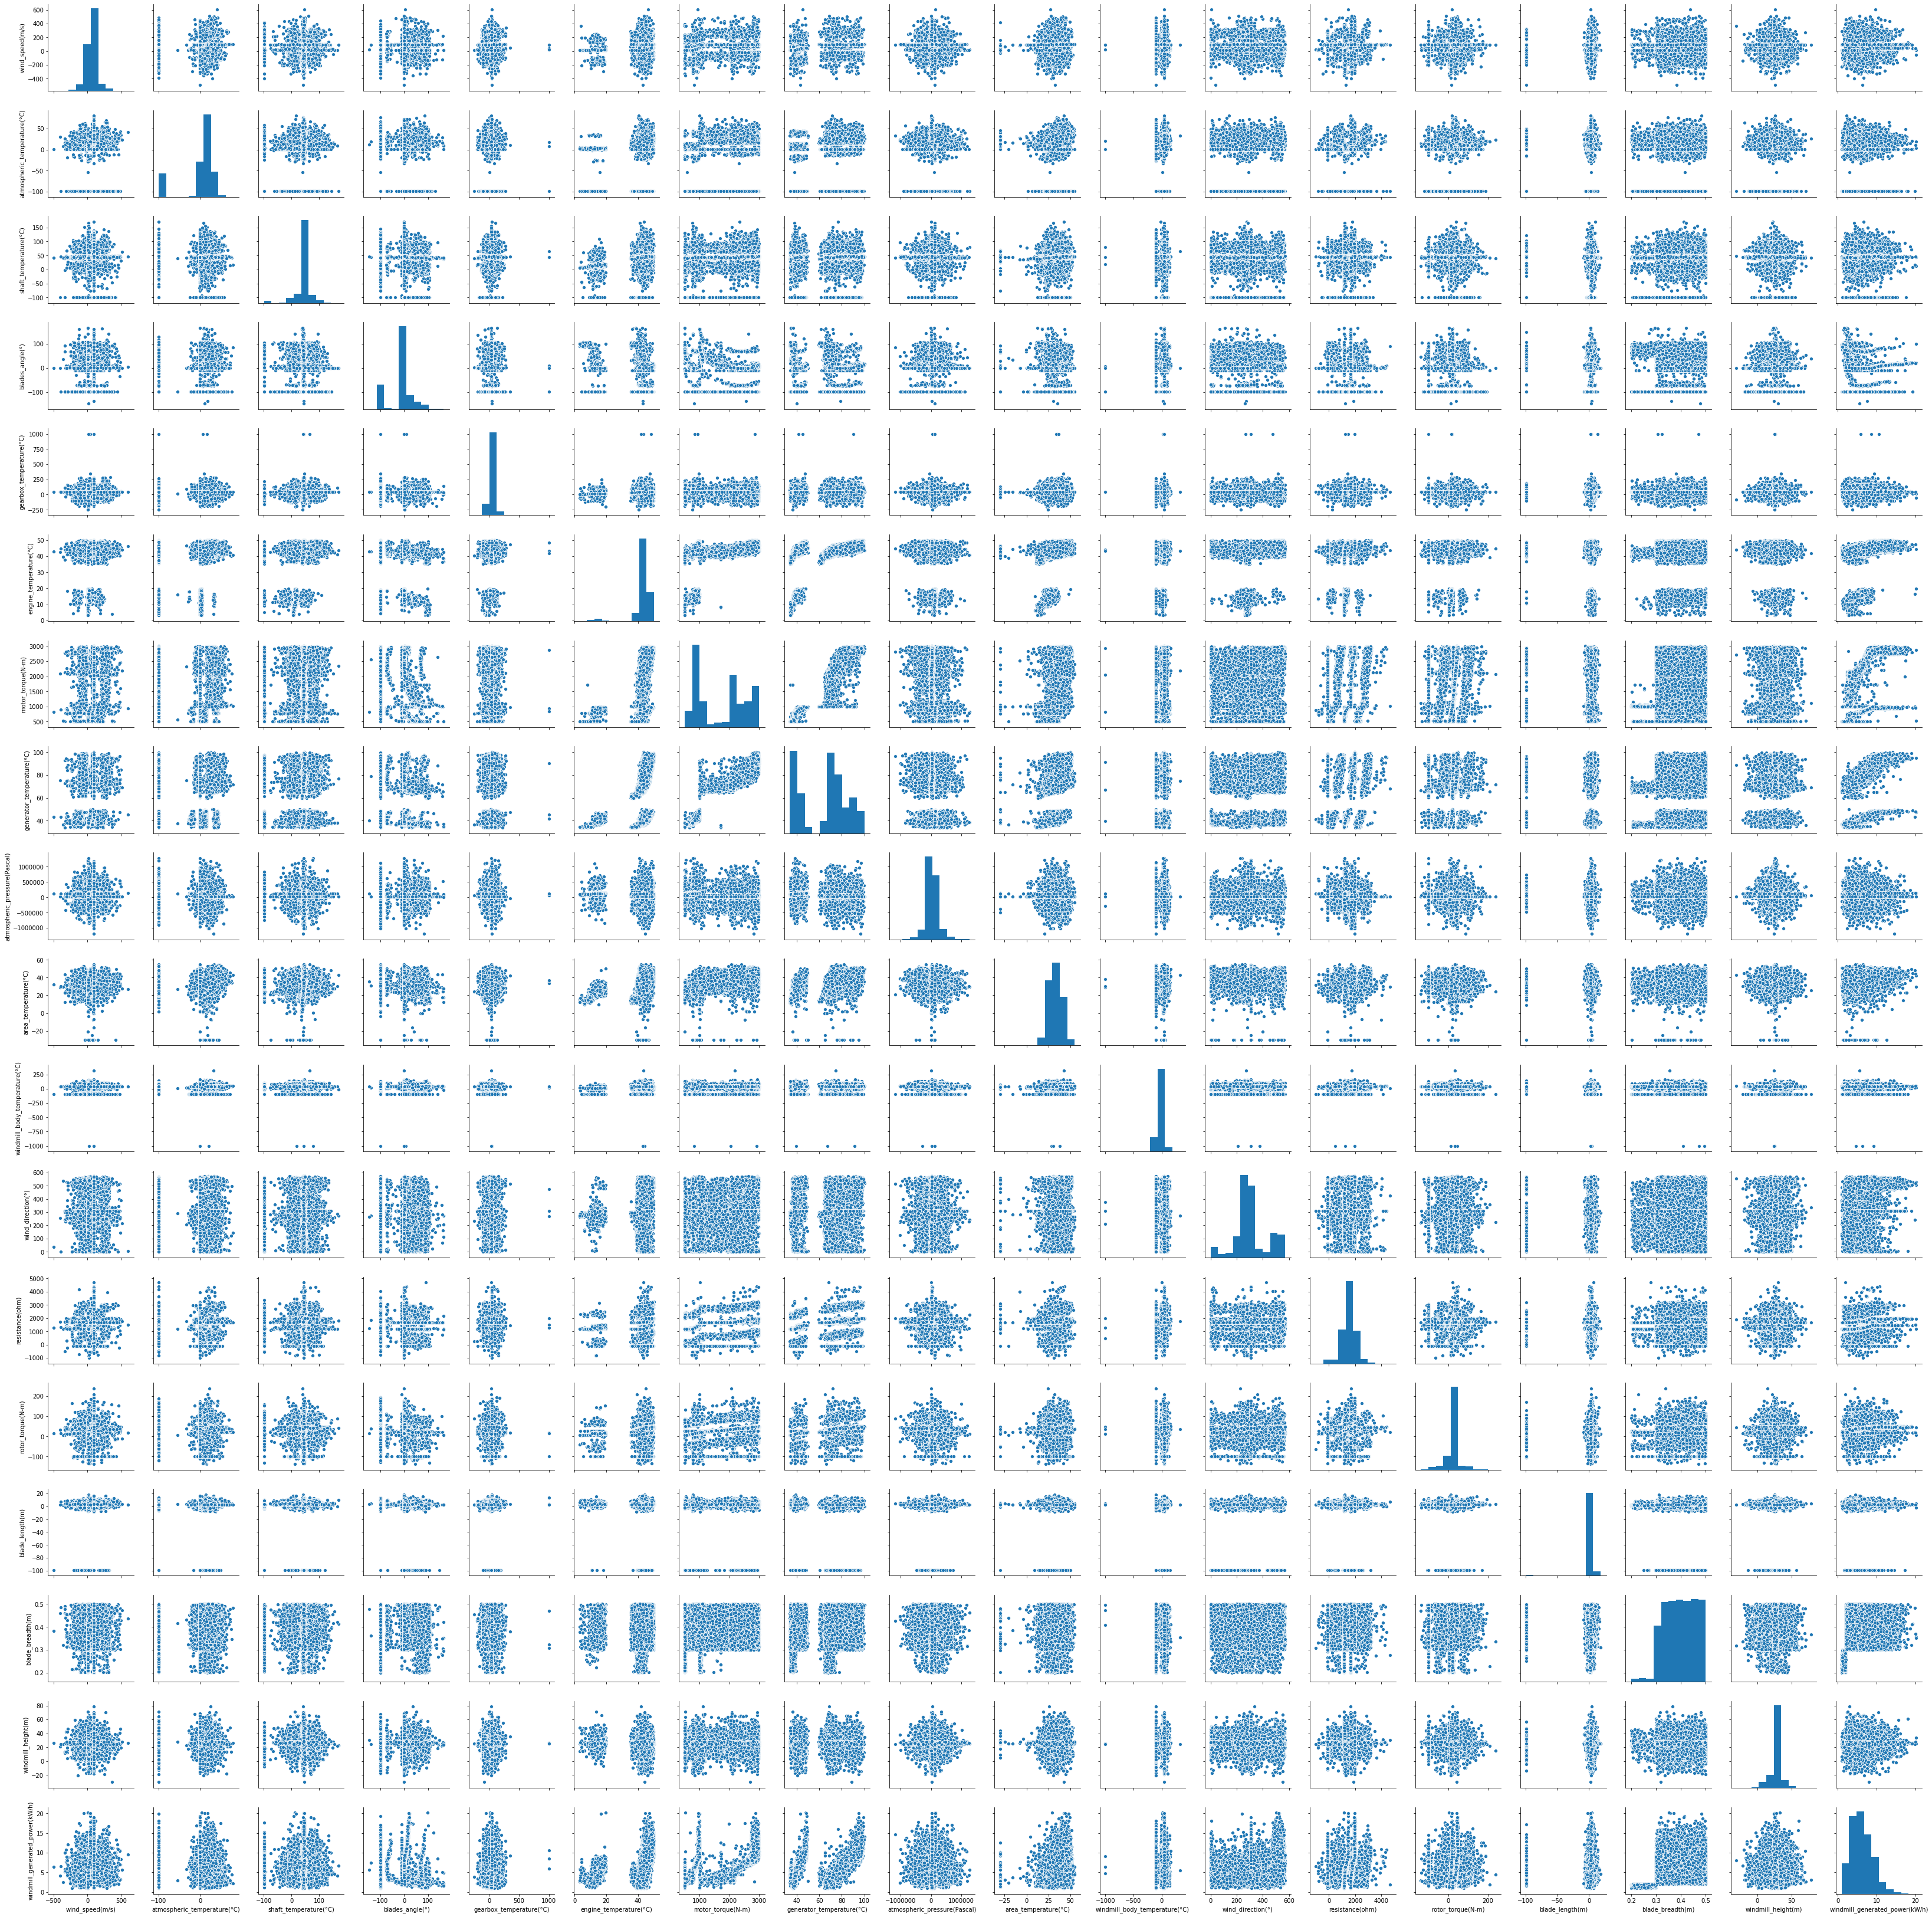

In [75]:
sns.pairplot(X)

Correleation between each features

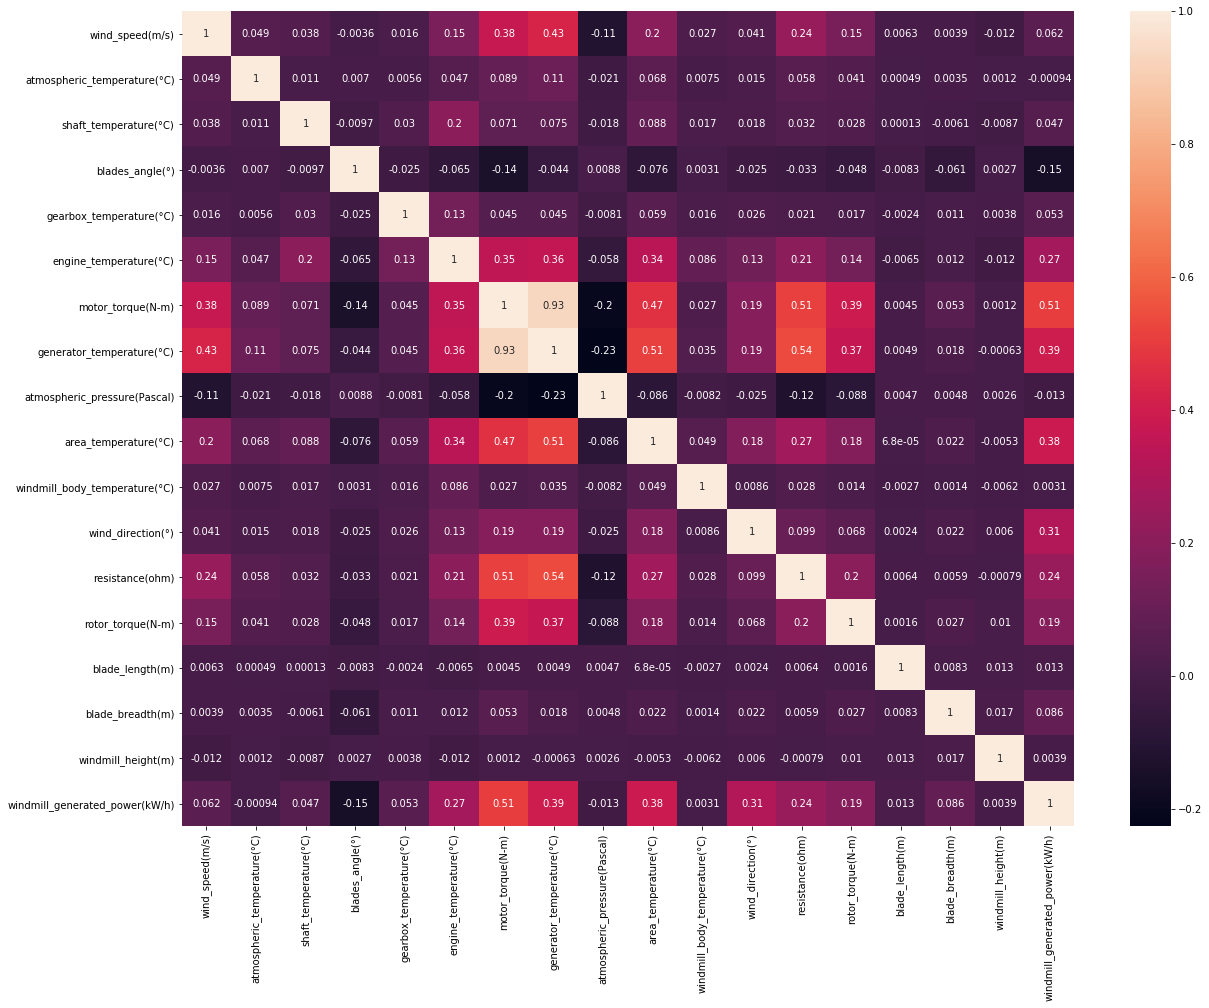

In [76]:
corrMatrix = X.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corrMatrix, annot=True)
plt.show()

Plotting the distribution of the individual fearure

In [77]:
L = X_test_full.describe() #I am assigning the summary of the dataframe to new variable, only because it contains the numerical values
K = X.describe() #I am assigning the summary of the dataframe to new variable, only because it contains the numerical values

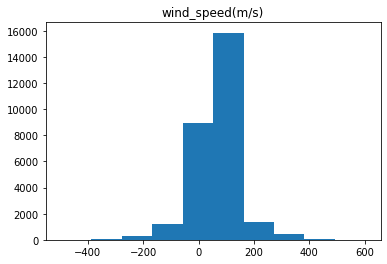

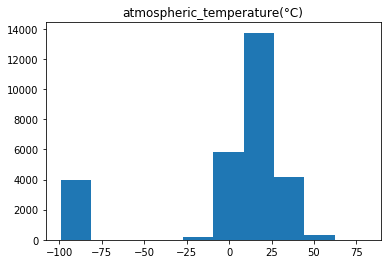

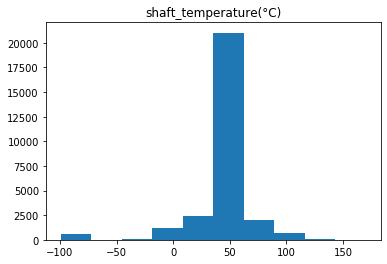

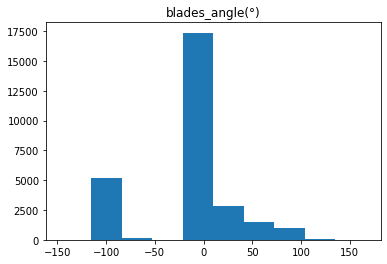

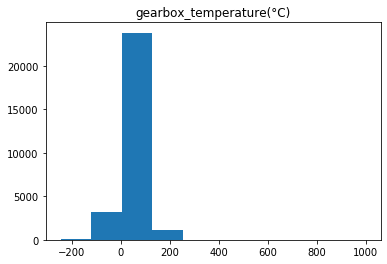

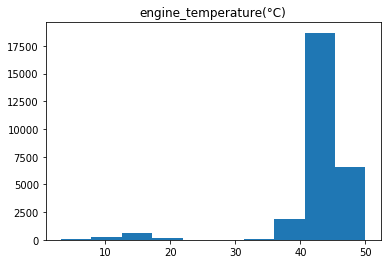

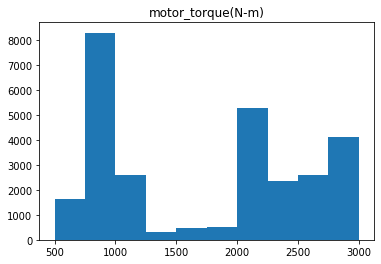

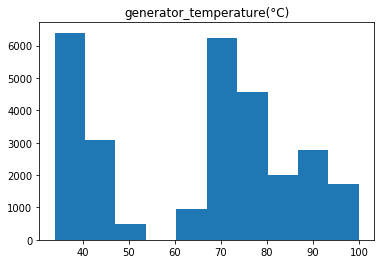

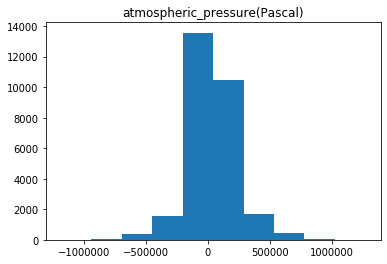

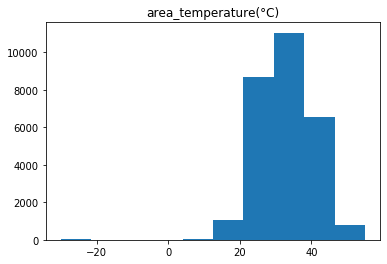

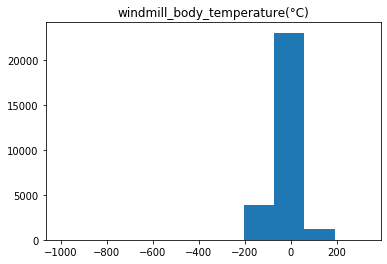

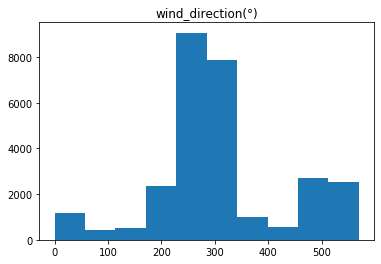

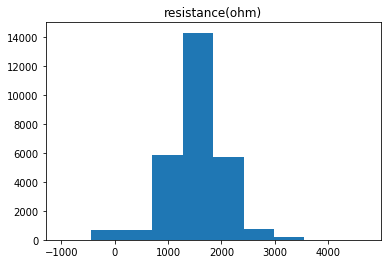

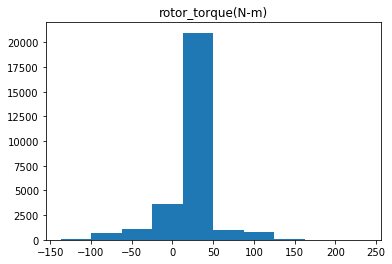

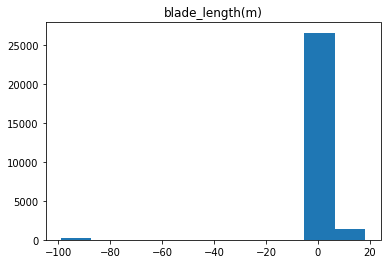

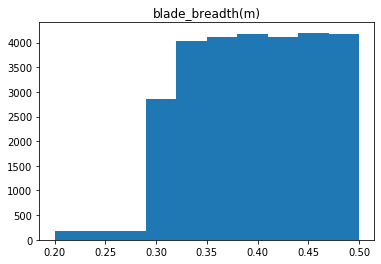

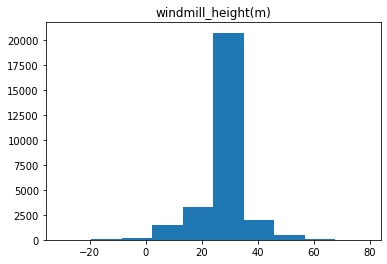

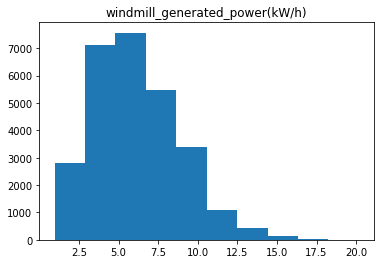

In [78]:
# Train data 
for i in K:
    plt.hist(X.loc[:,i])
    plt.title(i)
    plt.show()

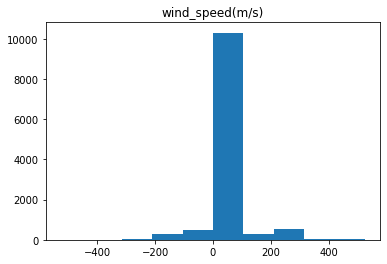

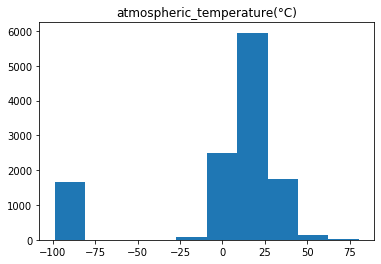

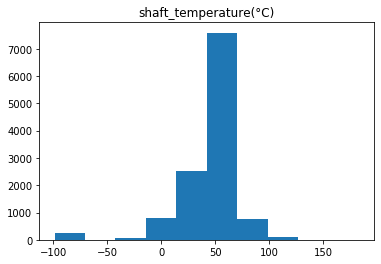

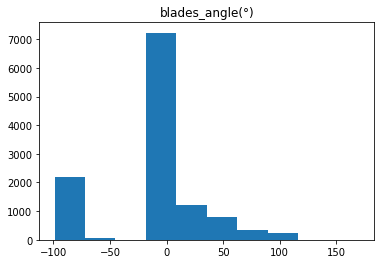

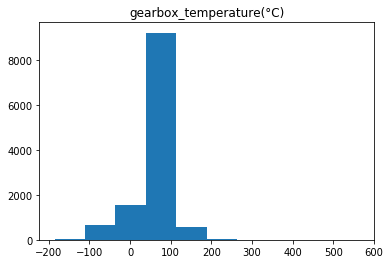

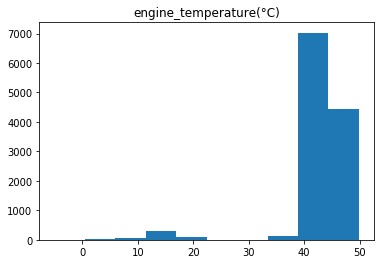

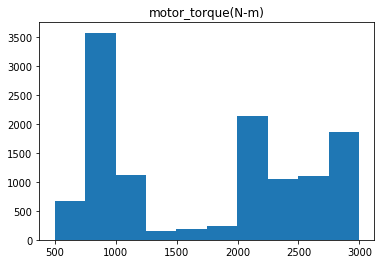

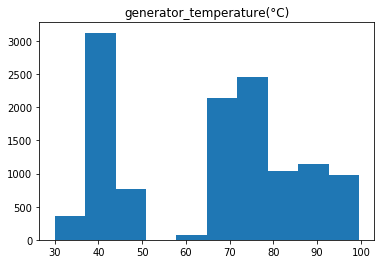

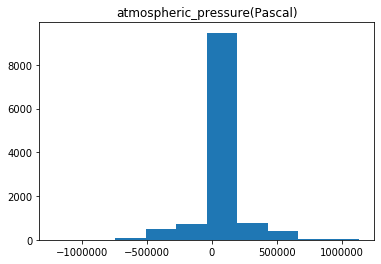

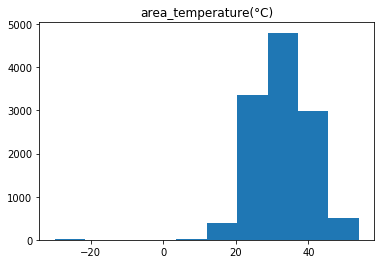

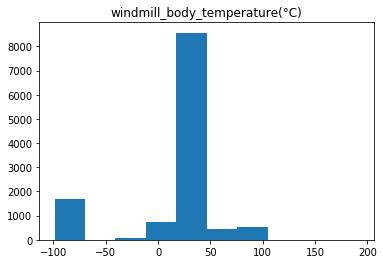

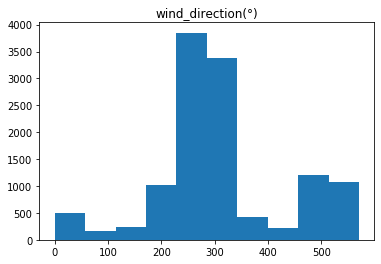

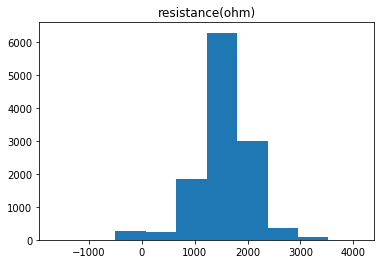

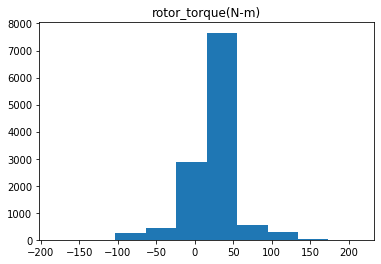

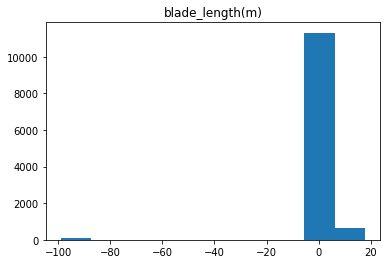

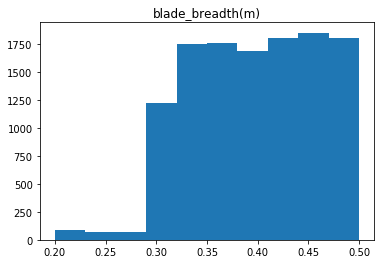

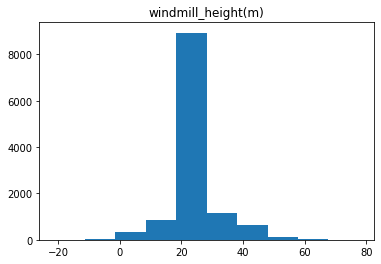

In [79]:
#test data
for i in L:
    plt.hist(X_test_full.loc[:,i])
    plt.title(i)
    plt.show()

### Feature Engineering

Let us extract the day, month, year, hour, minute and second feature from the datetime feature. Anyways date might have an huge impact on the power generated, as all the temperature factors depends upon the climatic changes. This might be a stupendous features to help the model.

** Even I thought of extracting one more feature based on the length of the character in the turbine_level but it didn't hep in boosting the accuracy of the model.

In [98]:
X['Dates'] = pd.to_datetime(X['datetime']).dt.date
X['year'] = pd.DatetimeIndex(X['Dates']).year
X['month'] = pd.DatetimeIndex(X['Dates']).month
X['date'] = pd.DatetimeIndex(X['Dates']).day
X['hour'] = pd.to_datetime(X['datetime']).dt.hour
X['minute'] = pd.to_datetime(X['datetime']).dt.minute
X['second'] = pd.to_datetime(X['datetime']).dt.second

X_test_full['Dates'] = pd.to_datetime(X_test_full['datetime']).dt.date
X_test_full['year'] = pd.DatetimeIndex(X_test_full['Dates']).year
X_test_full['month'] = pd.DatetimeIndex(X_test_full['Dates']).month
X_test_full['date'] = pd.DatetimeIndex(X_test_full['Dates']).day
X_test_full['hour'] = pd.to_datetime(X_test_full['datetime']).dt.hour
X_test_full['minute'] = pd.to_datetime(X_test_full['datetime']).dt.minute
X_test_full['second'] = pd.to_datetime(X_test_full['datetime']).dt.second

### Normalization

Based on the correlation depicted by the above chart and the distribution plot, I came into a conclusion of normalizing only a few features as follows:

In [99]:
X['wind_speed(m/s)'] = preprocessing.normalize(X[['wind_speed(m/s)']])
X_test_full['wind_speed(m/s)'] = preprocessing.normalize(X_test_full[['wind_speed(m/s)']])

X['shaft_temperature(°C)'] = preprocessing.normalize(X[['shaft_temperature(°C)']])
X_test_full['shaft_temperature(°C)'] = preprocessing.normalize(X_test_full[['shaft_temperature(°C)']])

X['engine_temperature(°C)'] = preprocessing.normalize(X[['engine_temperature(°C)']])
X_test_full['engine_temperature(°C)'] = preprocessing.normalize(X_test_full[['engine_temperature(°C)']])

X['atmospheric_pressure(Pascal)'] = preprocessing.normalize(X[['atmospheric_pressure(Pascal)']])
X_test_full['atmospheric_pressure(Pascal)'] = preprocessing.normalize(X_test_full[['atmospheric_pressure(Pascal)']])

X['windmill_body_temperature(°C)'] = preprocessing.normalize(X[['windmill_body_temperature(°C)']])
X_test_full['windmill_body_temperature(°C)'] = preprocessing.normalize(X_test_full[['windmill_body_temperature(°C)']])

### Target Variable 

As we saw in the data cleansing section, I had mentioned that I won't be filling the missing values of the target variable. We shall remove the entire row if we find missing value in target variable.

Then we shall separate the dependent and independent features from the training dataset.

In [100]:
X.dropna(axis=0, subset=['windmill_generated_power(kW/h)'], inplace=True)
y = X['windmill_generated_power(kW/h)']  
X.drop(['windmill_generated_power(kW/h)', 'Dates'], axis=1, inplace=True)

### Split data as train and test

X_train_full &  y_train ----> TRAIN DATA

X_valid_full & y_valid ----> TEST DATA

In [101]:
from sklearn.model_selection import train_test_split
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

### Converting categorical fetures to numerical features.

Better not to convert all the categorical features, let's give a condition that if the categorical features has less then 10 unique features then we shall convert them otherwise let us leave the rest as it is.

In [102]:
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

# One-hot encode the data (to shorten the code, we use pandas)
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

### Train Model

I am using the XGBoost model to train. 

In [120]:
# Define the model
my_model = XGBRegressor(n_estimators=800, learning_rate=0.1)

# Fit the model
my_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=800, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

### Validating the train and test data

In [121]:
# Get predictions
predictions = my_model.predict(X_valid)

# Calculate MAE
r2 = max(0, 100*metrics.r2_score(predictions, y_valid))
print("r2 score :" , r2)

r2 score : 96.69550601876115


### Predicting the test data and extracting the predictions to .csv file.

In [115]:
preds_test = my_model_2.predict(X_test)
output = pd.DataFrame({'tracking_id': X_test.index,'datetime': X_test_full.datetime ,'windmill_generated_power(kW/h)': preds_test})
output.to_csv('my_submission.csv', index=False)

# Thank You!